In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To Load Data set
df=pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
#checking null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

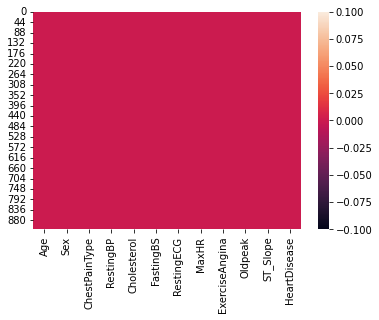

In [4]:
#visualizing null values
sns.heatmap(df.isnull())
plt.show()

In [5]:
#checking duplicate values
df.duplicated().sum()

0

In [6]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [49]:
#To check Sex columns data counts
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

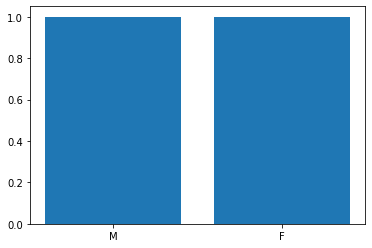

In [9]:
#Here visualizing between Sex and HeartDisease to check which gender have most of heart  disease problem
plt.bar(df['Sex'],df['HeartDisease'])
plt.show()

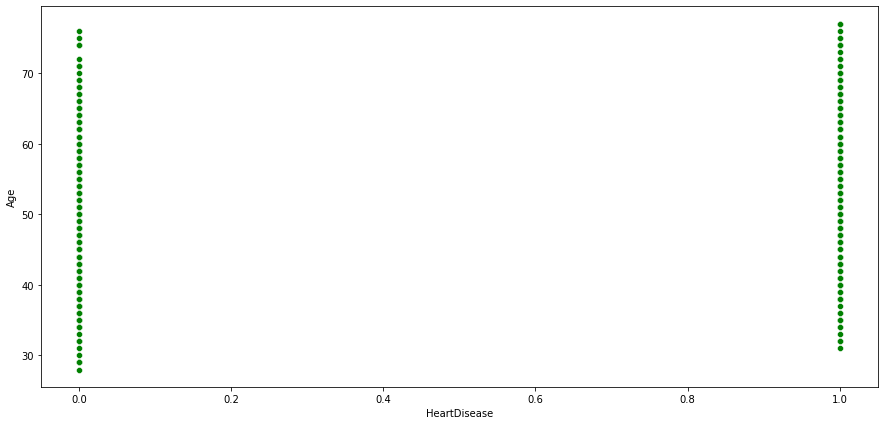

In [10]:
#visualizing Age and HeartDisease to check in which age  Heart Disease started 
plt.figure(figsize=(15,7))
sns.scatterplot(df['HeartDisease'],df['Age'],color='g')
plt.show()

In [11]:
#In Above viasualization we can clearly see most of the heart disease started after the age of 30

In [12]:
#splitting dataset  into 2 part
#first part hold all numerictype data
#second part hoold all object type data
h_num=df.select_dtypes(['int64','float64'])
h_cat=df.select_dtypes(object)


In [13]:
h_cat.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [14]:
#Apply Label Encoder to categorical data
from sklearn.preprocessing import LabelEncoder
columns=h_cat.columns
columns
for col in columns:
    #create object of LabelEncoder class
    le=LabelEncoder()
    h_cat[col]=le.fit_transform(h_cat[col])

In [15]:
h_cat.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


In [16]:
#concating the data set h_nun ,h_cat
h_new=pd.concat([h_cat,h_num],axis=1)
h_new.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0


In [17]:
#Now selecting input output
X=h_new.drop('HeartDisease',axis=1)
Y=h_new['HeartDisease']

In [18]:
#checking data is imbalance or not
Y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [19]:
#Train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [20]:
#First apply scaling on input data before train the data
#Apply standard scaler for input data training and testing

from sklearn.preprocessing import StandardScaler
#Create a object of StandardScaler class
ss=StandardScaler()
#means apply standard scaler for X_train data
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [22]:
#create a function for dataset so we can easy apply the all algorithm
def create_model(model): 
    model.fit(X_train,Y_train) #train the model
    Y_pred=model.predict(X_test) #test the model
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

# LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression
#create object of LogisticRegression class
lr=LogisticRegression()
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       109
           1       0.92      0.86      0.89       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276

[[ 96  13]
 [ 24 143]]


In [24]:
#In LogisticRegression recall score of 1 is 0.86 and accuracy is0.87

# DecisionTreeClassifier

In [25]:
#Next apply DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1) #by default Gini index
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.67      0.83      0.74       109
           1       0.87      0.73      0.79       167

    accuracy                           0.77       276
   macro avg       0.77      0.78      0.77       276
weighted avg       0.79      0.77      0.77       276

[[ 91  18]
 [ 45 122]]


In [26]:
#In DecisionTreeClassifier recall score of 1 is 0.73 
#accuracy is 0.77

In [27]:
#checking features importance
IG=dt.feature_importances_
print('Information Gain:',IG)
X.columns
dict={'Input':X.columns,'IG':IG}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

Information Gain: [0.02520328 0.04819978 0.01825944 0.03564709 0.37608492 0.05478001
 0.08227483 0.16409298 0.00704019 0.12455501 0.06386247]


,Input,IG
4,ST_Slope,0.376085
7,Cholesterol,0.164093
9,MaxHR,0.124555
6,RestingBP,0.082275
10,Oldpeak,0.063862
5,Age,0.054780
1,ChestPainType,0.048200
3,ExerciseAngina,0.035647
0,Sex,0.025203
2,RestingECG,0.018259


In [28]:
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy') #Now using entropy
dt1=create_model(dt)


              precision    recall  f1-score   support

           0       0.67      0.83      0.74       109
           1       0.87      0.73      0.79       167

    accuracy                           0.77       276
   macro avg       0.77      0.78      0.77       276
weighted avg       0.79      0.77      0.77       276

[[ 91  18]
 [ 45 122]]


In [29]:
#here Gini and entropy recall score are same so we choose Gini

In [30]:
#to reduce the overfitting we use pruning Technique
#max_depth
dt1=DecisionTreeClassifier(random_state=1,max_depth=2)
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.82      0.72      0.76       109
           1       0.83      0.90      0.86       167

    accuracy                           0.83       276
   macro avg       0.82      0.81      0.81       276
weighted avg       0.83      0.83      0.82       276

[[ 78  31]
 [ 17 150]]


In [31]:
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)#here min_samples_leaf=45 got best score
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.86      0.72      0.78       109
           1       0.83      0.92      0.88       167

    accuracy                           0.84       276
   macro avg       0.84      0.82      0.83       276
weighted avg       0.84      0.84      0.84       276

[[ 78  31]
 [ 13 154]]


# RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=19,max_features=2,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.77      0.84      0.81       109
           1       0.89      0.84      0.86       167

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276

[[ 92  17]
 [ 27 140]]


In [33]:
#In RandomForestClassifier we got recall score is 0.84 and accuracy is 0.84

In [34]:
X.shape

(918, 11)

# AdaBoostClassifier

In [35]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=1,n_estimators=1)
ada=create_model(ada)


              precision    recall  f1-score   support

           0       0.79      0.77      0.78       109
           1       0.85      0.87      0.86       167

    accuracy                           0.83       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.83      0.83      0.83       276

[[ 84  25]
 [ 22 145]]


In [36]:
#In AdaBoostClassifier we got recall score is 0.87 and accuracy is 0.83

# GradientBoostingClassifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=1,n_estimators=1) 
#call function
gbc=create_model(gbc)



              precision    recall  f1-score   support

           0       0.90      0.57      0.70       109
           1       0.77      0.96      0.86       167

    accuracy                           0.80       276
   macro avg       0.84      0.76      0.78       276
weighted avg       0.82      0.80      0.79       276

[[ 62  47]
 [  7 160]]


In [38]:
#In GradientBoostingClassifier we got recall score of 1 is 0.96 and accuracy is 0.80

# XGBClassifier

In [39]:
from xgboost import XGBClassifier
#create object of class XGBClassifier
xgc=XGBClassifier(n_estimators=13,random_state=1,reg_alpha=1)
xgc=create_model(xgc)



              precision    recall  f1-score   support

           0       0.81      0.86      0.84       109
           1       0.91      0.87      0.89       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276

[[ 94  15]
 [ 22 145]]


In [40]:
#In XGBClassifier we got recall score of 1 is 0.89 and accuracy is 0.87

# Support vector machine

In [41]:
#Support vector machine
from sklearn.svm import LinearSVC
svc=LinearSVC(random_state=1)
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       109
           1       0.92      0.85      0.88       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276

[[ 97  12]
 [ 25 142]]


In [42]:
#here score SVM  of 1 is 0.85 may be our model is overfitting so to make it bettere we use soft margin


In [43]:
svc1=LinearSVC(random_state=1,C=0.1)
svc1=create_model(svc1)
#here after applying soft margin in svm we get 0.86 recall score
#so now we are also checking if the data is linear or not so applying kernal function



              precision    recall  f1-score   support

           0       0.80      0.89      0.84       109
           1       0.92      0.86      0.89       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

[[ 97  12]
 [ 24 143]]


In [44]:
#Polynomial kernal function
from sklearn.svm import SVC
#create object of SVC class(for polynomial)
poly_svc=SVC(random_state=1,kernel='poly')
poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       109
           1       0.91      0.83      0.87       167

    accuracy                           0.85       276
   macro avg       0.84      0.86      0.85       276
weighted avg       0.86      0.85      0.85       276

[[ 96  13]
 [ 28 139]]


In [45]:
 #radial basis kernal function
#create object of SVC class(for radial basis)
r_svc=SVC(random_state=1,kernel='rbf')
r_svc=create_model(r_svc)

#here we got a good accuracy and recall score 
#accuracy =89
#recall score of 1 =89

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       109
           1       0.93      0.89      0.91       167

    accuracy                           0.89       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.89      0.89       276

[[ 97  12]
 [ 19 148]]


# KNeighborsClassifier

In [46]:
#now Apply KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn=create_model(knn)

#in KNN we got 0.86 recall score

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       109
           1       0.91      0.86      0.88       167

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276

[[ 95  14]
 [ 24 143]]


# Gaussian NaiveBayes

In [47]:
#Applyning Gaussian NaiveBayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb=create_model(gnb)
#in Gaussian NaiveBayes recall score is 0.83

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       109
           1       0.90      0.83      0.86       167

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276

[[ 94  15]
 [ 29 138]]


In [48]:
#In our data Set Model we got better accuracy and Recall Score in XGBClassifier
#Recall is 0.96
#Accuracy is 0.88